[Reference](https://github.com/rohit6969/PCA-from-Scratch/blob/main/PCA_RohitParajuli_1928322.ipynb)

* Principal Component analysis reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset.
* Principal Component analysis to be like fitting an n-dimensional ellipsoid to the data so that each axis of the ellipsoid represents a principal component. The larger the principal component axis the larger the variability in data it represents.

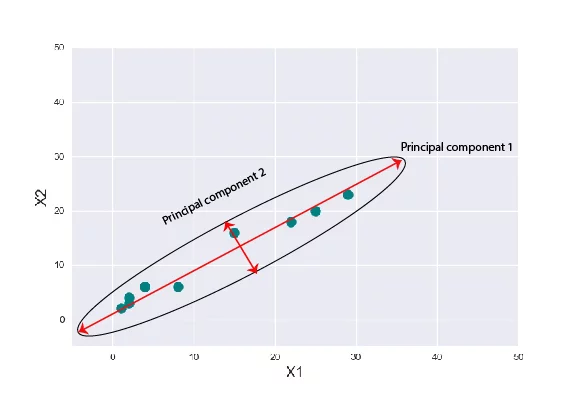

In [ ]:
import numpy as np

###**Subtract the mean of each variable**



In [ ]:
#Generate a dummy dataset.
X = np.random.randint(10,50,100).reshape(20,5) 
# mean Centering the data  
X_meaned = X - np.mean(X , axis = 0)

X

array([[39, 27, 49, 16, 21],
       [39, 48, 35, 47, 23],
       [22, 28, 43, 19, 48],
       [27, 29, 18, 15, 45],
       [18, 33, 22, 38, 31],
       [38, 37, 33, 34, 11],
       [32, 30, 13, 38, 17],
       [14, 25, 30, 12, 49],
       [38, 49, 38, 30, 25],
       [23, 17, 39, 40, 31],
       [16, 12, 20, 45, 35],
       [12, 20, 40, 27, 14],
       [25, 47, 33, 12, 38],
       [49, 34, 34, 25, 40],
       [17, 23, 34, 38, 35],
       [11, 43, 47, 12, 15],
       [33, 18, 28, 27, 42],
       [31, 24, 25, 40, 29],
       [29, 44, 10, 34, 16],
       [43, 27, 11, 46, 30]])

In [ ]:
X_meaned

array([[ 11.2 ,  -3.75,  18.9 , -13.75,  -8.75],
       [ 11.2 ,  17.25,   4.9 ,  17.25,  -6.75],
       [ -5.8 ,  -2.75,  12.9 , -10.75,  18.25],
       [ -0.8 ,  -1.75, -12.1 , -14.75,  15.25],
       [ -9.8 ,   2.25,  -8.1 ,   8.25,   1.25],
       [ 10.2 ,   6.25,   2.9 ,   4.25, -18.75],
       [  4.2 ,  -0.75, -17.1 ,   8.25, -12.75],
       [-13.8 ,  -5.75,  -0.1 , -17.75,  19.25],
       [ 10.2 ,  18.25,   7.9 ,   0.25,  -4.75],
       [ -4.8 , -13.75,   8.9 ,  10.25,   1.25],
       [-11.8 , -18.75, -10.1 ,  15.25,   5.25],
       [-15.8 , -10.75,   9.9 ,  -2.75, -15.75],
       [ -2.8 ,  16.25,   2.9 , -17.75,   8.25],
       [ 21.2 ,   3.25,   3.9 ,  -4.75,  10.25],
       [-10.8 ,  -7.75,   3.9 ,   8.25,   5.25],
       [-16.8 ,  12.25,  16.9 , -17.75, -14.75],
       [  5.2 , -12.75,  -2.1 ,  -2.75,  12.25],
       [  3.2 ,  -6.75,  -5.1 ,  10.25,  -0.75],
       [  1.2 ,  13.25, -20.1 ,   4.25, -13.75],
       [ 15.2 ,  -3.75, -19.1 ,  16.25,   0.25]])

###**Calculate the Covariance Matrix**

In [ ]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar = False)
#The default value for rowvar is set to True, remember to set it to False to get the covariance matrix in the required dimensions.

cov_mat

array([[122.90526316,  36.94736842, -18.55789474,  31.63157895,
        -13.05263158],
       [ 36.94736842, 119.56578947,  11.60526316, -24.80263158,
        -41.96052632],
       [-18.55789474,  11.60526316, 132.93684211, -63.02631579,
         -7.71052632],
       [ 31.63157895, -24.80263158, -63.02631579, 144.72368421,
        -41.27631579],
       [-13.05263158, -41.96052632,  -7.71052632, -41.27631579,
        138.51315789]])

###**Compute the Eigenvalues and Eigenvectors**

* The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.

* A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

* Orthogonal means the vectors are mutually perpendicular to each other.

In [ ]:
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
#NumPy linalg.eigh( ) method returns the eigenvalues and eigenvectors of a complex Hermitian or a real symmetric matrix.

In [ ]:
eigen_values,eigen_vectors

(array([ 39.16705985, 127.45927439, 139.09779264, 198.28933094,
        231.13917376]),
 array([[-0.4628333 , -0.58541738, -0.51640005, -0.38619228,  0.165101  ],
        [ 0.15233023,  0.57295254, -0.80055303,  0.05001583,  0.07165302],
        [ 0.59246224, -0.0180895 ,  0.0378769 , -0.79248722, -0.13853018],
        [ 0.64153358, -0.54109767, -0.21679259,  0.44087322,  0.23298014],
        [ 0.0020002 , -0.18946754, -0.20979075,  0.16108613, -0.94558825]]))

###**Sort Eigenvalues in descending order**

* Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.

* Remember each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.

* Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

In [ ]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]

#np.argsort returns an array of indices of the same shape.

###**Select a subset from the rearranged Eigenvalue matrix**

In [ ]:
#Select a subset from the rearranged Eigenvalue matrix as per our need i.e. number_comp = 2. This means we selected the first two principal components.
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

# n_components = 2 means our final data should be reduced to just 2 variables. if we change it to 3 then we get our data reduced to 3 variables.

###**Transform the data**

* Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.
* The final dimensions of X_reduced will be ( 20, 2 ) and originally the data was of higher dimensions ( 20, 5 ).

In [ ]:
#Transform the data 
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

In [ ]:
X_meaned

array([[  5.25,  -4.  ,   4.3 ,   9.7 ,  -7.25],
       [ -8.75,  16.  ,   4.3 ,  -6.3 ,  -1.25],
       [-15.75,  -6.  , -15.7 ,   1.7 , -17.25],
       [ -8.75, -18.  ,   6.3 ,  -9.3 ,  13.75],
       [  6.25,  11.  , -10.7 ,  13.7 , -11.25],
       [ -0.75, -16.  ,  -5.7 ,  12.7 ,  13.75],
       [ 17.25,   4.  ,  -9.7 ,   4.7 ,  16.75],
       [ 10.25,  15.  ,   4.3 ,   6.7 , -15.25],
       [ 12.25,  -5.  ,   6.3 ,   7.7 , -14.25],
       [-10.75, -10.  ,  -7.7 ,   3.7 ,  15.75],
       [ -9.75,  12.  ,   2.3 ,  -3.3 , -18.25],
       [ 19.25,  13.  ,  17.3 , -18.3 ,  20.75],
       [  1.25,   2.  ,  11.3 , -21.3 , -14.25],
       [  4.25, -11.  ,  15.3 ,  -8.3 , -15.25],
       [ 12.25,  -3.  ,  17.3 ,   7.7 ,   4.75],
       [ -7.75,  -7.  ,  -3.7 ,  -6.3 ,  -3.25],
       [-11.75,  13.  , -21.7 ,  -5.3 ,   9.75],
       [ 10.25, -11.  , -17.7 ,  10.7 , -17.25],
       [-11.75, -11.  ,  13.3 , -12.3 ,  18.75],
       [-12.75,  16.  ,  -9.7 ,  11.7 ,  20.75]])

In [ ]:
X_reduced

array([[  9.09991056,  -2.52667206],
       [ -1.17965469,  -2.2071183 ],
       [ 15.85212858,  16.19523153],
       [-18.77568213,  -4.39895857],
       [ 17.13203322,  10.84382977],
       [-10.52364287,  11.82059239],
       [-10.2652495 ,   5.99566939],
       [ 18.15258865,  -6.11864147],
       [ 16.06006168,  -8.87435769],
       [-15.45567211,  13.92189789],
       [ 15.41963332,  -1.8518595 ],
       [-22.17138137, -25.2194673 ],
       [  7.29644695, -21.02389135],
       [ 10.28046995, -20.4323571 ],
       [ -3.28664111, -14.43104893],
       [  0.33684471,   2.27405087],
       [ -8.45662271,  21.61889953],
       [ 22.16037108,  11.4569865 ],
       [-25.16600692,  -8.95487048],
       [-16.50993529,  21.91208489]])

###**Final Implementation from scratch**

In [ ]:
import numpy as np
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

def PCA(X , num_components):
     
    #Step-1
    X = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X , rowvar = False, bias=True)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eig(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    projection_matrix = (sorted_eigenvectors.transpose()[:2]).transpose()
     
    #Step-6
    X_reduced = X.dot(projection_matrix)
     
    return X_reduced

In [ ]:
from sklearn import datasets
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 0:4] 
y = iris.target

mat_reduced = PCA(X , 2)
mat_reduced

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(y, columns = ['target'])] , axis = 1)

principal_df

,PC1,PC2,target
0,-2.684126,-0.319397,0
1,-2.714142,0.177001,0
2,-2.888991,0.144949,0
3,-2.745343,0.318299,0
4,-2.728717,-0.326755,0
...,...,...,...
145,1.944110,-0.187532,2
146,1.527167,0.375317,2
147,1.764346,-0.078859,2
148,1.900942,-0.116628,2


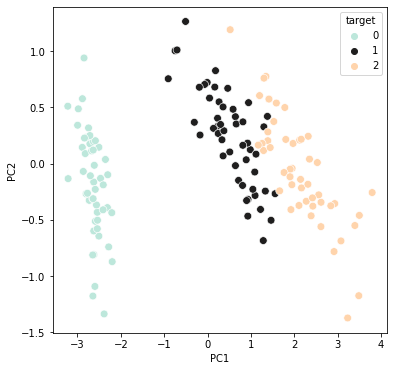

In [ ]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

###**Final Implemetation using library**

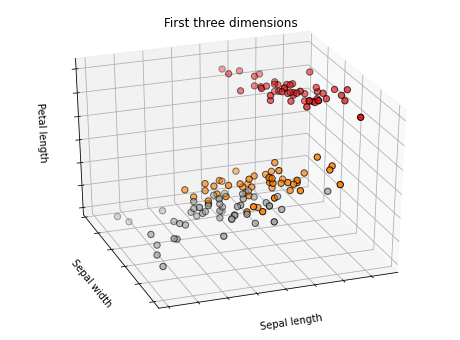

In [ ]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :4] 
y = iris.target


# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=2).fit_transform(iris.data[:, :4])
ax.scatter(
    X[:, 0],
    X[:, 1],
    X[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three dimensions")
ax.set_xlabel("Sepal length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal width")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal length")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
principal_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(y, columns = ['target'])] , axis = 1)

principal_df

,PC1,PC2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


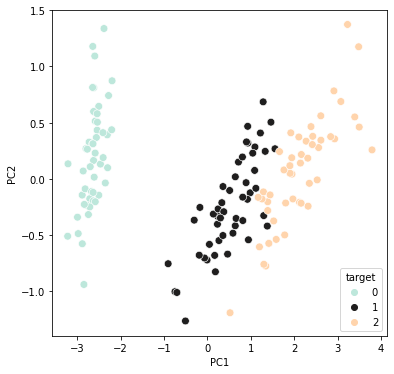

In [ ]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')